In [1]:
import z3

In [2]:
from z3 import *

In [3]:
from itertools import product

In [4]:
nq_solver = Solver()

In [5]:
import time
from itertools import chain

In [12]:
def Abs(x):
    return If(x >= 0, x, -x)

def nqueens(N):
    nq_solver = Solver()
    queens = [Int('Q{}'.format(i)) for i in range(N)]
    nq_solver.add(*chain(*[(0 <= q, q < N) for q in queens]))  # valid range constraint
    nq_solver.add(Distinct(queens))  # different row constraint
    for i, q1 in enumerate(queens):
        for j, q2 in enumerate(queens):
            if i == j: continue
            nq_solver.add(Abs(q1 - q2) != abs(i - j))  # different diagonal constraint
    return nq_solver

In [13]:
runtimes = []
solutions = []
sizes = [4]

for N in sizes:
    nq_solver = nqueens(N)
    start = time.perf_counter()
    assert nq_solver.check(), "Uh oh...The solver failed to find a solution. Check your constraints."
    end = time.perf_counter()
    print("{}-queens: {}ms".format(N, (end-start) * 1000))
    runtimes.append((end - start) * 1000)
    solutions.append(nq_solver.model())

4-queens: 32.696537665287906ms


In [10]:
solutions

[[Q0 = 2, Q1 = 0, Q3 = 1, Q2 = 3]]

In [14]:
N=4
queens=[Int('Q{}'.format(i)) for i in range(N)]
nq_solver=Solver()
print(*chain(*[(0 <= q, q < N) for q in queens]))
type(queens)
print(Distinct(queens))
nqueens(4)

Q0 >= 0 Q0 < 4 Q1 >= 0 Q1 < 4 Q2 >= 0 Q2 < 4 Q3 >= 0 Q3 < 4
Distinct(Q0, Q1, Q2, Q3)


[Q0 >= 0,
 Q0 < 4,
 Q1 >= 0,
 Q1 < 4,
 Q2 >= 0,
 Q2 < 4,
 Q3 >= 0,
 Q3 < 4,
 Distinct(Q0, Q1, Q2, Q3),
 If(Q0 - Q1 >= 0, Q0 - Q1, -(Q0 - Q1)) != 1,
 If(Q0 - Q2 >= 0, Q0 - Q2, -(Q0 - Q2)) != 2,
 If(Q0 - Q3 >= 0, Q0 - Q3, -(Q0 - Q3)) != 3,
 If(Q1 - Q0 >= 0, Q1 - Q0, -(Q1 - Q0)) != 1,
 If(Q1 - Q2 >= 0, Q1 - Q2, -(Q1 - Q2)) != 1,
 If(Q1 - Q3 >= 0, Q1 - Q3, -(Q1 - Q3)) != 2,
 If(Q2 - Q0 >= 0, Q2 - Q0, -(Q2 - Q0)) != 2,
 If(Q2 - Q1 >= 0, Q2 - Q1, -(Q2 - Q1)) != 1,
 If(Q2 - Q3 >= 0, Q2 - Q3, -(Q2 - Q3)) != 1,
 If(Q3 - Q0 >= 0, Q3 - Q0, -(Q3 - Q0)) != 3,
 If(Q3 - Q1 >= 0, Q3 - Q1, -(Q3 - Q1)) != 2,
 If(Q3 - Q2 >= 0, Q3 - Q2, -(Q3 - Q2)) != 1]

In [15]:
import matplotlib.pyplot as plt
runtimes = []
solutions = []
sizes = [8, 16, 32, 64]

for N in sizes:
    nq_solver = nqueens(N)
    start = time.perf_counter()
    assert nq_solver.check(), "Uh oh...The solver failed to find a solution. Check your constraints."
    end = time.perf_counter()
    print("{}-queens: {}ms".format(N, (end-start) * 1000))
    runtimes.append((end - start) * 1000)
    solutions.append(nq_solver.model())

plt.plot(sizes, runtimes)

8-queens: 44.378581433193176ms
16-queens: 271.3050350462254ms
32-queens: 20824.895665725762ms
64-queens: 29837.475781658213ms


In [8]:
solutions

[[Q1 = 1,
  Q6 = 4,
  Q0 = 3,
  Q3 = 2,
  Q4 = 5,
  Q2 = 6,
  Q5 = 7,
  Q7 = 0], [Q8 = 15,
  Q12 = 14,
  Q3 = 4,
  Q11 = 6,
  Q13 = 11,
  Q10 = 3,
  Q1 = 7,
  Q6 = 10,
  Q9 = 5,
  Q14 = 8,
  Q0 = 9,
  Q4 = 1,
  Q5 = 13,
  Q2 = 2,
  Q15 = 0,
  Q7 = 12], [Q8 = 6,
  Q22 = 13,
  Q16 = 26,
  Q30 = 2,
  Q12 = 15,
  Q11 = 4,
  Q24 = 21,
  Q10 = 9,
  Q18 = 7,
  Q26 = 28,
  Q0 = 17,
  Q31 = 0,
  Q7 = 3,
  Q29 = 11,
  Q20 = 1,
  Q3 = 8,
  Q13 = 20,
  Q19 = 30,
  Q25 = 12,
  Q1 = 29,
  Q6 = 10,
  Q9 = 27,
  Q14 = 14,
  Q21 = 5,
  Q27 = 19,
  Q4 = 25,
  Q5 = 18,
  Q15 = 23,
  Q2 = 22,
  Q28 = 16,
  Q17 = 31,
  Q23 = 24], [Q37 = 18,
  Q43 = 38,
  Q53 = 21,
  Q12 = 16,
  Q46 = 49,
  Q11 = 19,
  Q48 = 45,
  Q24 = 60,
  Q10 = 12,
  Q40 = 59,
  Q50 = 7,
  Q18 = 50,
  Q49 = 9,
  Q26 = 25,
  Q0 = 47,
  Q51 = 51,
  Q55 = 17,
  Q7 = 27,
  Q29 = 23,
  Q41 = 42,
  Q39 = 52,
  Q20 = 29,
  Q57 = 13,
  Q35 = 53,
  Q4 = 31,
  Q5 = 34,
  Q15 = 63,
  Q2 = 46,
  Q17 = 58,
  Q23 = 62,
  Q8 = 1,
  Q22 = 28,
  Q30 = 2

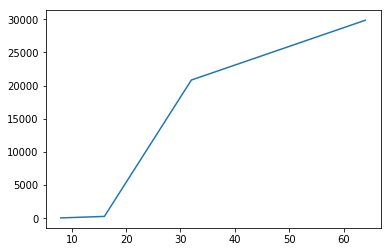

In [17]:
plt.plot(sizes, runtimes)
plt.show()